# Object Oriented Santa's Route

Santa Claus lives in a wonderfull world! Let's implement his world with object oriented programming? This migh help us develop cleaner code when searching for the best path for his deliveries.

## The City
The lowest level we can get in his world are the cities. They have some properties:
* ```x```: the horizontal location on a map
* ```y```: the vertical location on a map
* ```id```: the city id, corresponds to the city name

From those basic properties we may create another one:
* ```coord```:  the tuple ```(x, y)```

Then we may chek if a city is prime or not:
* ```is_prime```:  Boolean indication if is prime

### Let's implement all that and see how it works:

In [1]:
import math

class City:   
    def __init__(self, id_, x, y):
        self.x = x
        self.y = y
        self.coord = (x, y)
        self.id = id_
        self.is_visited = False
        self.is_prime = self.check_prime()
        
    def check_prime(self):
        """
        Checks if a city is prime
        """
        if self.id % 2 == 0 and self.id > 2: 
            return False
        return all(self.id % i for i in range(3, int(math.sqrt(self.id)) + 1, 2))
    
    def visit(self):
        """
        Mark city as visited
        """
        self.is_visited = True
        
    def __repr__(self):
        '''
        Prints all the properties of the object. idea is to be as verbose as possible.
        Implementing __repr__ or __str__ will make it easy to print and inspect in the notebook.
        '''
        fmt_str = 'CityId: {} \nCoordinates: {}\nIs prime: {}\nIs visited: {}'
        return fmt_str.format(self.id, self.coord, self.is_prime, self.is_visited)

To create a city object we just have to call ```City(id, x, y)``` passing the apropriate parameters:

In [2]:
foo = City(2, 1, 1) # a city object with id=2, x=1 and y=1
foo

CityId: 2 
Coordinates: (1, 1)
Is prime: True
Is visited: False

Let's visit the city now!

In [3]:
foo.visit()
foo

CityId: 2 
Coordinates: (1, 1)
Is prime: True
Is visited: True

Now we may create a different city.

In [4]:
# creating another City
bar = City(4, 3, 0)
bar

CityId: 4 
Coordinates: (3, 0)
Is prime: False
Is visited: False

Good! We have cities! Now let's start building the world.

## The World
First of all, the world is simply a collection of unique cities. So... we may represent the world by a dict of cities! (we are using a dict, with city ids as keys, for the purpose of easy indexin and searching cities in the world. It would be inneficient to scan the whole world to find a city.

Santa's world has one basic property that is listing all cities that are part of it. Let's first implement two methods in the world, one to add a new city, another one to remove an existing city.

### Let's create the world

In [5]:
import matplotlib.pyplot as plt

class World:
    def __init__(self):
        self.cities = dict()
    
    def add(self, city):
        """
        Adds a single city to the world
        """
        if isinstance(city, City):
            # checks if the object type added to the world is correct
            self.cities[city.id] = city
        else:
            raise TypeError ('city must be a "__main__.City" object!')

In [6]:
# Creating an empty world
world = World()
# Getting the list of cities
world.cities

{}

Now we may add the two cities that we had created before to the world:

In [7]:
# adding the foo city
world.add(foo)
# adding the bar city
world.add(bar)
world.cities

{2: CityId: 2 
 Coordinates: (1, 1)
 Is prime: True
 Is visited: True, 4: CityId: 4 
 Coordinates: (3, 0)
 Is prime: False
 Is visited: False}

Let's try to add the bar city again to the same world. Because bar already exists in the world, we shouldn't see a new city added to the world.

In [8]:
# adding the bar city again should trow an error
world.add(bar)
world.cities

{2: CityId: 2 
 Coordinates: (1, 1)
 Is prime: True
 Is visited: True, 4: CityId: 4 
 Coordinates: (3, 0)
 Is prime: False
 Is visited: False}

We can access each city properties by doing a for loop:

In [9]:
for id_, c in world.cities.items():
    print(c, '\n')

CityId: 2 
Coordinates: (1, 1)
Is prime: True
Is visited: True 

CityId: 4 
Coordinates: (3, 0)
Is prime: False
Is visited: False 



Ok! We have a really basic implementation of the world. Let's add some other methods to be able to load the Santa's world.

In [10]:
class World:
    def __init__(self):
        self.cities = dict()
        self.df = pd.DataFrame()
    
    def add(self, city):
        """
        Adds a single city to the world
        """
        if isinstance(city, City):
            # checks if the object type added to the world is correct
            self.cities[city.id] = city
        else:
            raise TypeError ('city must be a "__main__.City" object!')
        self.update_df()
    
    def remove_by_id(self, id_):
        """
        Removes a single city from the world
        """
        self.cities.pop(id_)
    
    def bulk_add_city(self, dataframe):
        """
        Adds cities in bulk from a DataFrame
        """
        dataframe['city'] = dataframe.apply(lambda x: City(x.iloc[0], x.iloc[1], x.iloc[2]), axis=1)
        dataframe = dataframe.drop(['X','Y'], axis=1)
        dataframe = dataframe.set_index('CityId')
        cities = dataframe.to_dict()['city']
        self.cities.update(cities)
        self.update_df()
    
    def size(self):
        """
        Gets the quantity of cities in the world
        """
        return self.df.shape[0]
    
    def primes(self):
        """
        Gets the world prime cities
        """
        return [c for idx, c in self.cities.items() if c.is_prime]
    
    def nonprimes(self):
        """
        Gets the world nonprime cities
        """
        return [c for idx, c in self.cities.items() if not c.is_prime]
    
    def north_pole(self):
        """
        Gets the North Pole
        """
        return self.cities[0]
                
    def ids(self):
        """
        Gets all world cities ids
        """
        return list(self.cities.keys())
    
    def get_city(self, id_):
        """
        Get a city by id
        """
        return self.cities[id_]
    
    def update_df(self):
        """
        Get cities coordinates as a dataframe
        """
        dataframe = pd.DataFrame.from_dict(world.cities, orient='index', columns=['city'])
        dataframe['x'] = dataframe.apply(lambda x: x.iloc[0].x, axis=1)
        dataframe['y'] = dataframe.apply(lambda x: x.iloc[0].y, axis=1)
        dataframe['id'] = dataframe.apply(lambda x: x.iloc[0].id, axis=1)
        dataframe['is_prime'] = dataframe.apply(lambda x: x.iloc[0].is_prime, axis=1)
        self.df = dataframe
    
    def plot(self, show_primes=False):
        """
        Creates a world plot, mark the north pole. Option to show primes in different collor
        """
        self.df.plot.scatter(x='x', y='y', s=0.07, figsize=(15, 10), c='green', alpha=0.6)

        if show_primes:
            coords = self.df[self.df['is_prime']]
            plt.scatter(x=coords.x, y=coords.y, c='red', s=0.1, alpha=0.6)
        
        plt.scatter(self.north_pole().x, self.north_pole().y, c='blue', s=16)
        plt.axis('off')
        
        return plt.show()


Now we can bulk insert all cities from a dataframe into our world. Let's do that

In [11]:
import pandas as pd
df = pd.read_csv('./data/cities.csv')
df.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


In [12]:
df.shape # the dataset shape

(197769, 3)

In [13]:
world = World() # creates a new empty world
world.cities

{}

In [14]:
world.bulk_add_city(df) # adds all cities from the dataframe into the world

Let's check how many cities we have in the Santa's World (the size of the world). We should have the same number of cities as the number of lines in the dataframe.

In [15]:
world.size()

197769

We can easily get the North Pole coordinates:

In [16]:
world.north_pole().coord

(316.83673906150904, 2202.34070733524)

Or count the number of prime cities in the world:

In [17]:
len(world.primes())

17804

Finally we can plot all cities in a map. North Pole in blue.

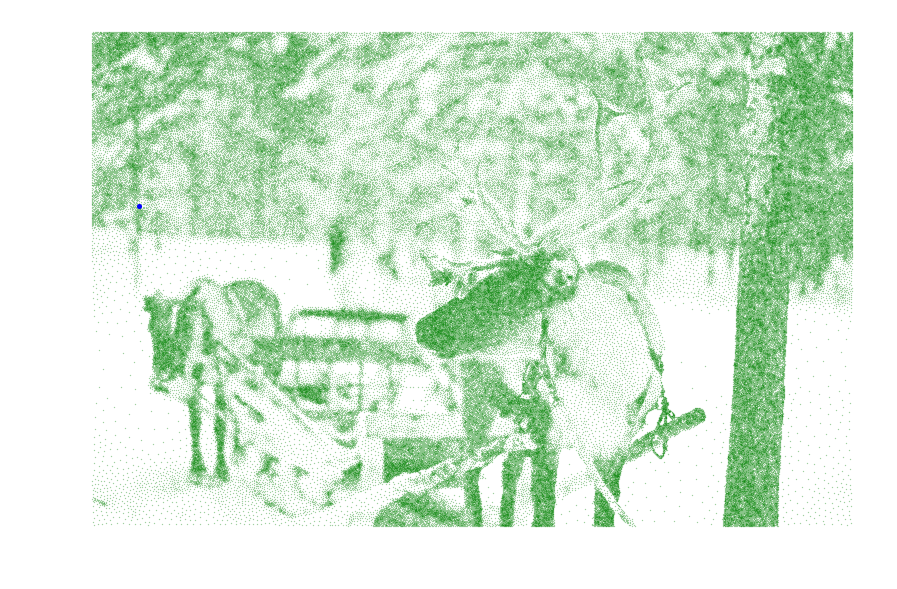

In [18]:
world.plot()

We can also show all primes cities in red.

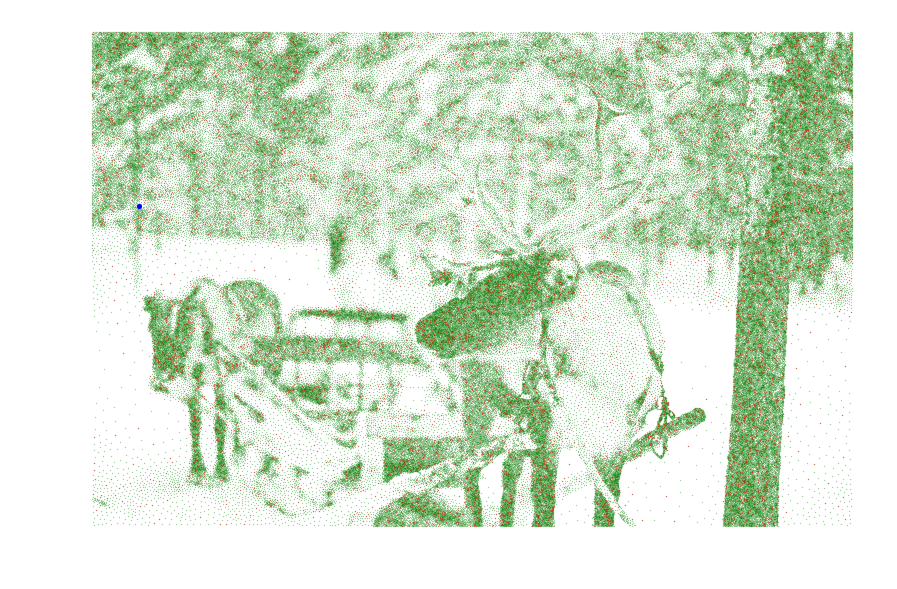

In [19]:
world.plot(show_primes=True)

## The Route
Next we will create a route to guide Rudolf during the Christmas Eve. A route is a collection of cities, or stops, that are visited in sequence by Santa Claus and his reindeers. We may represent it by a list. Let's implement that.

In [22]:
import io
import base64
import time

import numpy as np

from concorde.tsp import TSPSolver

import pylab as pl
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

from IPython.display import display, HTML

class Route():
    def __init__(self, world):
        # Init path with just the North Pole
        self.world = world
        self.stops = [self.world.north_pole()]
        self.tenth_steps = []
        self.prime_tenth_steps = self.get_prime_tenth_steps()
        
    @staticmethod
    def distance(a, b):
        """
        calculates the euclidian distance between 2 cities
        """
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    def size(self):
        """
        Calculates the number of stops in the path
        """
        return len(self.stops)
    
    def add(self, ids):
        """
        Add stop to path
        """
        if isinstance(ids, type(list())):
            for id_ in ids:
                self.stops.append(self.world.get_city(id_))
        elif isinstance(ids, type(int())):
            self.stops.append(self.world.get_city(ids))
    
    def add_world(self):
        """
        Adds all cities in the world to the route
        """
        self.add(list(range(1, self.world.size())))
        
    def cost(self):
        """
        Calculates the Path Cost Function - penalized distance of the full path
        """
        dist = 0
        l = self.size()
        for idx, stop in enumerate(self.stops):
            curr_ = stop
            step_number = idx + 1
            if step_number < l:
                next_ = self.stops[step_number]
            if step_number % 10 == 0 and not curr_.is_prime:
                dist += self.distance(curr_, next_) * 1.1
            else:
                dist += self.distance(curr_, next_)
        return dist
    
    def euclidian_cost(self):
        """
        Calculates the Path Cost Function - without penalties
        """
        dist = 0
        l = self.size()
        for idx, stop in enumerate(self.stops):
            curr_ = stop
            step_number = idx + 1
            if step_number < l:
                next_ = self.stops[step_number]
            dist += self.distance(curr_, next_)
        return dist
    
    def penalty(self):
        """
        Total penalty by not going to prime cities
        """
        return self.cost() - self.euclidian_cost()
    
    def get_tenth_steps(self):
        """
        Get the cities of all 10th steps
        """
        self.tenth_steps = [c for s,c in enumerate(self.stops) if (s + 1) % 10 == 0]
        return self.tenth_steps
    
    def get_prime_tenth_steps(self):
        """
        Get cities in 10th steps that are prime 
        """
        primes = self.world.primes()
        self.prime_tenth_steps = [c for c in self.tenth_steps if c in primes]
        return self.prime_tenth_steps
    
    def get_ids(self):
        """
        Get a ordered list of all city ids in the path.
        """
        return [c.id for c in self.stops]

    def concorde(self, time):
        """
        Solve the problem with concorde solver. Without penalization of prime cities.
        """
        x = [c.x for c in self.stops[:-1]]
        y = [c.y for c in self.stops[:-1]]

        # Instantiate solver
        solver = TSPSolver.from_data(x, y, norm="EUC_2D")
        
        # solve
        tour_data = solver.solve(time_bound=float(time), verbose=True, random_seed=42)
        
        # Reorder the route with concorde solution
        order = np.append(tour_data.tour,[0])
        new_route = [self.stops[i] for i in order]
        self.stops = new_route
    
    def plot(self, show_primes=False, show_10th_step=False, show_intersection=False):
        """
        Plot the route
        """
        lwidth, lalpha = 0.4, 0.6
        lines = [[self.stops[i].coord,self.stops[i + 1].coord] for i in range(0, self.size() - 1)]
        lc = mc.LineCollection(lines, linewidths=lwidth, alpha=lalpha, colors='red')
        fig, ax = pl.subplots(figsize=(20,20))
        
        ax.set_aspect('equal')
        ax.add_collection(lc)
        ax.autoscale()   
        
        if show_primes:
            # get coords of prime cities
            coords = self.world.df[self.world.df['is_prime']]
            # plot
            pc = plt.scatter(x=coords.x, y=coords.y, c='green', s=3, alpha=0.3) 
            ax.add_collection(pc)
        
        if show_10th_step:
            # get coords of each 10th stop
            coords = [c.coord for c in self.tenth_steps]
            coords = pd.DataFrame(coords, columns=['x','y'])
            # plot 
            pc = plt.scatter(x=coords.x, y=coords.y, c='blue', s=3, alpha=0.3) 
            ax.add_collection(pc)
        
        if show_intersection:
            # get coords of each 10th stop
            coords = [c.coord for c in self.prime_tenth_steps]
            coords = pd.DataFrame(coords, columns=['x','y'])
            # plot 
            pc = plt.scatter(x=coords.x, y=coords.y, c='black', s=4, alpha=0.5) 
            ax.add_collection(pc)
            return
            
    def animation(self, steps=500):
        """
        Creates a route animation
        """
        lwidth, lalpha = 0.4, 0.6
        lines = [[self.stops[i].coord,self.stops[i + 1].coord] for i in range(0, self.size() - 1)]
        fig, ax = pl.subplots(figsize=(15,15))
        line, = ax.plot([], [], linewidth=lwidth, alpha=lalpha, color='red')
        ax.set_ylim(0, 3650)
        ax.set_xlim(0, 5250)
        
        def animate(i):
            s = int(i+1) * steps
            try:
                data = lines[s - steps:s]
            except IndexError:
                data = lines
            lc = mc.LineCollection(data, linewidths=lwidth, alpha=lalpha, colors='red')
            ax.add_collection(lc)
        
        ani = animation.FuncAnimation(fig, animate, frames=int(len(lines) / steps), repeat=True)
        ani.save('test.gif', writer='imagemagick', fps=20)
        plt.close(1)
        filename = 'test.gif'
        video = io.open(filename, 'r+b').read()
        encoded = base64.b64encode(video)
        return HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))            
    
    def load(self, path):
        """
        Loads external solution from csv file
        """
        df = pd.read_csv(path)
        ids = df['Path'].values.tolist()
        self.stops = []
        for id_ in ids:
            self.stops.append(self.world.get_city(id_))
        
    def submit(self, filename):
        """
        Export the path as a csv, on the required submission format
        """
        dataframe = pd.DataFrame(self.stops, columns=['city'])
        dataframe['Path'] = dataframe.apply(lambda x: x.iloc[0].id, axis=1).astype(int)
        dataframe[['Path']].to_csv(filename, index=False)

ModuleNotFoundError: No module named 'concorde.tsp'

Our route starts with just one city: the North Pole.

In [ ]:
route = Route(world)
route.stops

Checking the first city id and coordinates.

In [ ]:
route.stops[0].id, route.stops[0].coord

In [ ]:
# adding all cities ordered by id
route.add_world()
# adding north pole at the end of 
route.add(0)

In [ ]:
route.cost()

In [ ]:
route.animation()

In [ ]:
route.plot()

In [ ]:
route.submit('index_submission.csv')

## Concorde Solver

Now we can solve the path using concorde solver:

In [ ]:
route.concorde(60)

Then calculate its cost:

In [ ]:
route.cost()

Or get the simple euclidian cost:

In [ ]:
route.euclidian_cost()

Or the penalty by not visiting prime cities at the 10th steps.

In [ ]:
route.penalty()

Or get the percentage of cities in tenth steps that are primes.

In [ ]:
route.get_tenth_steps()
route.get_prime_tenth_steps()
len(route.prime_tenth_steps) / len(route.tenth_steps)

Plot the path:

In [ ]:
route.plot()

Or plot the path showing the prime cities:

In [ ]:
route.plot(show_primes=True)

Or showing every 10th step:

In [ ]:
route.plot(show_10th_step=True)

Or both:

In [ ]:
route.plot(show_primes=True, show_10th_step=True)

Or Only the 10th steps that are primes:

In [ ]:
route.plot(show_intersection=True)

Let's plot an animation to see how santa would visit the cities:

In [ ]:
route.animation()

In [ ]:
route.submit('concorde_submission.csv')